Below are the images of digits from 0-9.

<Figure size 432x288 with 0 Axes>

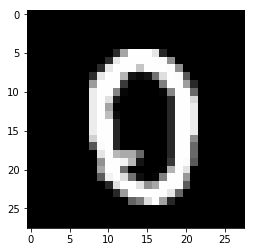

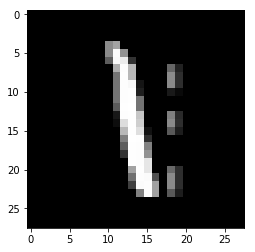

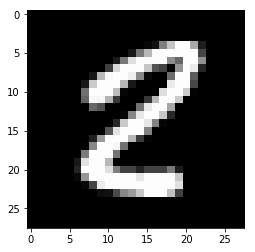

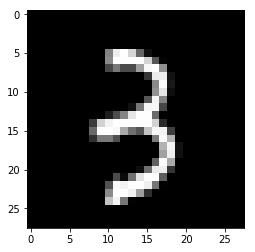

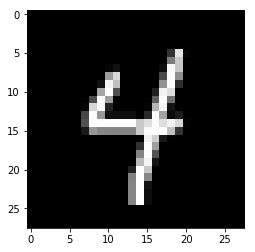

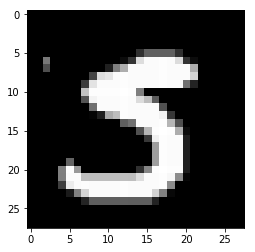

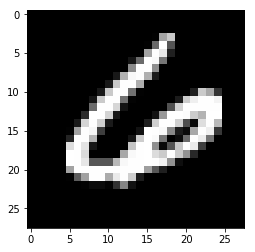

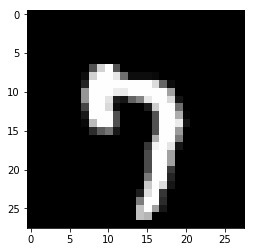

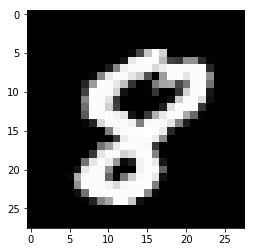

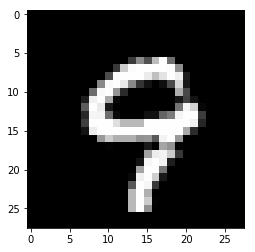

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sys
import os
import random
import matplotlib.pyplot as plt
np.random.seed(0)
#embed = pd.read_csv('digits-embedding.csv',header=None)
from PIL import Image
data = pd.read_csv('digits-raw.csv',header=None)
colors = ['aquamarine', 'g', 'r', 'coral', 'm', 'khaki', 'turquoise', 'navy', 'yellowgreen', 'pink']
embed = pd.read_csv('digits-embedding.csv', header=None, names=['id', 'label', 'X', 'Y'])
grouped = data.groupby(data.iloc[:,1])
df = grouped.apply(lambda data: data.sample(n=1, replace=True))
def show_digit(df,i):
    x = np.array(df.iloc[i,2:])
    im = x.reshape(28, 28)
    plt.gray()
    plt.show()
    plt.imshow(im)
    #plt.savefig('Fig-'+str(i)+'.png', dpi=100)
for i in range(10):
    show_digit(df,i)
colors = ['aquamarine', 'g', 'r', 'coral', 'm', 'khaki', 'turquoise', 'navy', 'yellowgreen', 'pink']
embed = pd.read_csv('digits-embedding.csv', header=None, names=['id', 'label', 'X', 'Y'])



Below is the image showing clusters of data for all the class labels(0-9)

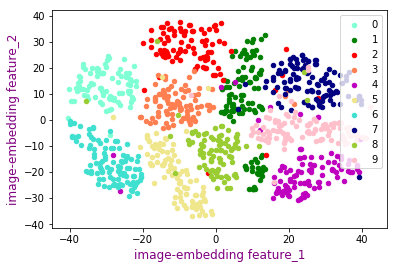

In [4]:
def visualizeFeatures(data):
    examples = np.random.randint(0, len(data), size=1000)
    Examples = data.iloc[examples]
    numLabels = len(data['label'].unique())
    Examples = Examples.groupby('label')
    fig, ax = plt.subplots()
    for i in range(numLabels):
        X = Examples.get_group(i).X
        Y = Examples.get_group(i).Y
        ax.scatter(X, Y, s = 20,c=colors[i], label=i)
    ax.legend()
    plt.xlabel("image-embedding feature_1",fontsize=12,color='purple')
    plt.ylabel("image-embedding feature_2",fontsize=12,color='purple')
    plt.show()
    #plt.savefig('Fig-cluster.png', dpi=80)
    plt.close()
visualizeFeatures(embed)

With a K value of 10 on the complete dataset digits-embedding.csv, below are the values for WC-SSD, SC and NMI.

WC-SSD: 1433531.469
SC: 0.712
NMI: 0.356

Below is the graph for WC-SSD values against different values of K plotted for different Datasets.


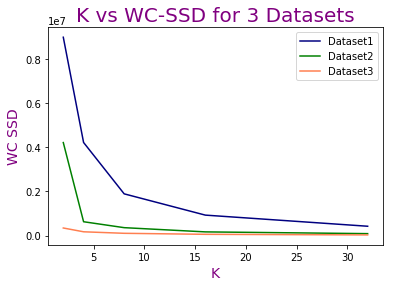

Below is the graph for SC values against different values of K plotted for different Datasets.


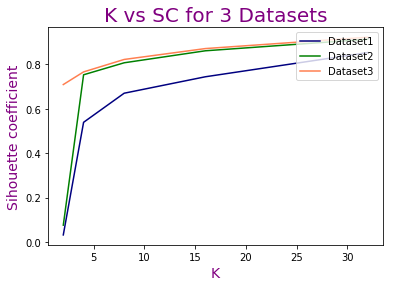

In [8]:
x = np.array([2,4,8,16,32])
y = np.round(np.array([0.03192010261119105,0.5390623074418945,0.6696056646087385,0.7436359984961678,0.8529585364276098]),3)
y1 = np.round(np.array([0.0764053478045465,0.7530532359516512,0.8072002109328441,0.8612300240125899,0.9126459308638912]),3)
y2 = np.round(np.array([0.7089822043356615,0.7663760263309349,0.8218654323488418,0.8705674356567056,0.9221852430250068]),3)
area = np.pi*10

plt.plot(x, y, label = 'Dataset1',color = 'navy')
plt.plot(x, y1, label = 'Dataset2',color = 'g',)
plt.plot(x, y2, label = 'Dataset3',color = 'coral',)
plt.title('K vs SC for 3 Datasets',fontsize=20,color='purple')
plt.xlabel('K',fontsize=14,color='purple')
plt.ylabel('Sihouette coefficient',fontsize=14,color='purple')
plt.legend(loc='upper right')
#plt.savefig('Fig-2.2.1_SC.pdf',bbox_inches='tight')
plt.autoscale(enable=False, axis='y', tight=True)
plt.show()
plt.close()

We decide the optimal K values based on elbow in the above plots in problem 2.2.1.
My K values would be 8 for Dataset 1, 4 for Datsaset 2 and 4 for Dataset 3.

WC-SSD - Observations:
For Dataset1 and Dataset2, WC-SSD values decrease exponentially with an increase in the value of K till K= 16 and then reduction reduces making the graph constant. Clearly,with an increase in the number of clusters, the distance of the points to the nearest cluster redcues.

For Dataset 3, WC-SSD value does not change much as overall we have only 2 clusters in the  dataset and making more and more clusters would not give us any optimization.

SC- Observations:
Again, for Dataset1 and Dataset2, we have an almost exponential increase in SC values till k=8 and then a gradual increase for the rest of the K values. This would be because with less number of clusters, we would not have much difference in distance between points in same cluster and different clusters. 

For Dataset 3, we can see a gradual increase in SC values with an increase in K.


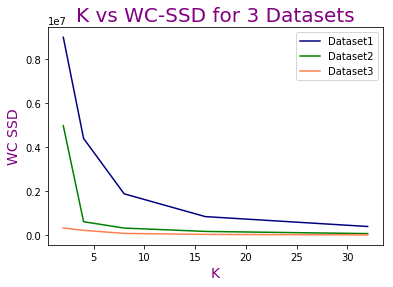

I ran k-means algorithm for different K sizes and random seeds ranging from 0 to 9.
For all the three datasets, both WC-SSD and SC values remain the same for all the 10 seeds. Hence mean values for this problem are the same as the WC-SSD, SC values we get with seed = 0.
While standard deviation is zero for all the the 3 datasets obviously because of no changes in the WC-SSD/SC values with a change in seed.

Hence, we can say that K-means sensivity is zero to intial starting conditions in this case. In other words, changing the initial random seed values make no difference to the k-means.

NMI for Dataset 1 with K =8 :
0.347
NMI for Dataset 2 with K =4 :
0.1796
NMI for Dataset 3 with K =4 :
0.0

Below is the graph for visualization of data for Dataset1:


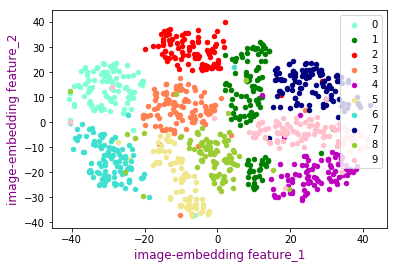

In [23]:
2.4

Below is the graph for visualization of data for Dataset2:


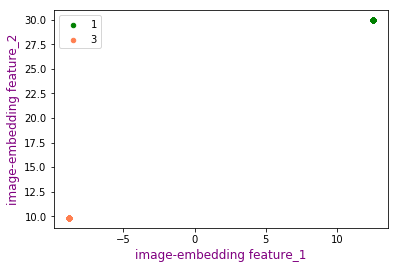

In [38]:
2.4

Below is the graph for visualization of data for Dataset3:

In [ ]:
2.4

Dendrogram for Single Linkage


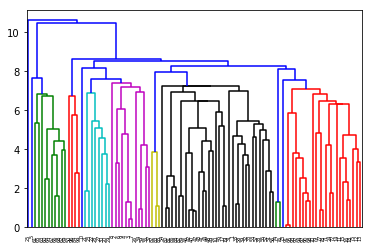

Dendrogram for Complete Linkage


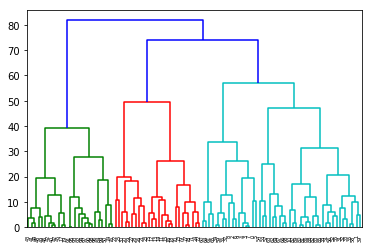

Dendrogram for Average Linkage


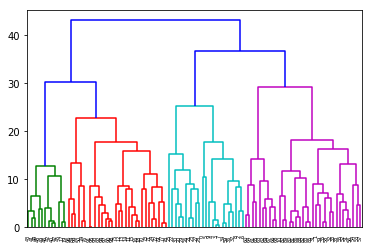

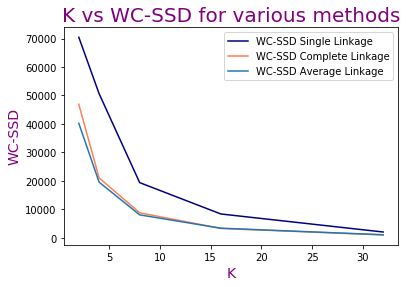

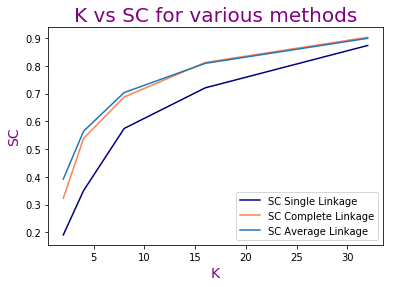